# Data Collection

Download data From https://www.kaggle.com/datasets/mohamedouledhamed/phishing-site-urls

# importing required packages 

#### #  - installing Dependency

In [1]:
pip install tld

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install googlesearch-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse

import tldextract
import re
from bs4 import BeautifulSoup
from googlesearch import search
import requests
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')
import pickle# use to dump model 
from pandas import json_normalize

In [5]:
df = pd.read_csv("phishing_site_urls.csv") #reading of Dataset

In [6]:
df.tail() #display the first five (5) rows of the DataFrame

,URL,Label
549342,23.227.196.215/,bad
549343,apple-checker.org/,bad
549344,apple-iclods.org/,bad
549345,apple-uptoday.org/,bad
549346,apple-search.info,bad


In [7]:
df.rename(columns={'URL': 'Domain'}, inplace=True) # Rename URL to domain

In [8]:
df['Label'].replace('bad', 'Unsafe', inplace=True) # Rename Bad to Phishing


In [9]:
df['Label'].replace('good', 'Safe', inplace=True) # Rename Good to Legitimate


In [10]:
df.head()

,Domain,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,Unsafe
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,Unsafe
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,Unsafe
3,mail.printakid.com/www.online.americanexpress....,Unsafe
4,thewhiskeydregs.com/wp-content/themes/widescre...,Unsafe


In [11]:
#create a dataframe of classes counts
pd.DataFrame(df.Label.value_counts())


,count
Label,
Safe,392925
Unsafe,156422


In [12]:
import pandas as pd
import tldextract
from urllib.parse import urlparse
from pandas import json_normalize





def extract_root_domain(url):
    # Use tldextract to extract the root domain
    extracted = tldextract.extract(url)
    root_domain = f"{extracted.domain}.{extracted.suffix}"
    return root_domain

def get_url_length(url):
    return len(url)

def get_domain_length(url):
    domain_extract = tldextract.extract(url)
    return len(domain_extract.domain)




def get_dot_count(url):
    domain_extract = tldextract.extract(url)
    return int(domain_extract.domain.count('.') > 4)


def get_url_region(url):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    "co.uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }
    
    for ccTLD in ccTLD_to_region:
        if url.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]
    
    return "Global"

def ip_address(url):
    # Regular expression for detecting IP addresses in URLs
    ip_regex = r'(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)'
    
    match = re.search(ip_regex, url)
    
    if match:
        return 1  # IP address found in the URL
    else:
        return 0  # No IP address found in the URL

def get_special_chars_in_domain(url):
    domain_extract = tldextract.extract(url)
    domain = domain_extract.domain
    return int(any(char.isnumeric() or not char.isalnum() for char in domain))

def get_special_chars_in_url(url):
    return int(any(char.isnumeric() or not char.isalnum() for char in url))

def get_tld_length(url):
    domain_extract = tldextract.extract(url)
    return len(domain_extract.suffix)

def get_hyphen_in_domain(url):
    domain_extract = tldextract.extract(url)
    return int('-' in domain_extract.domain)

def get_at_symbol(url):
    parsed_url = urlparse(url)
    return int('@' in parsed_url.netloc)

def get_path_length(url):
    parsed_url = urlparse(url)
    return len(parsed_url.path)

def get_query_params_count(url):
    parsed_url = urlparse(url)
    return int(len(parsed_url.query.split('&')) > 0)

def get_has_fragment(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.fragment))

def get_subdomain_count(url):
    domain_extract = tldextract.extract(url)
    return int(len(domain_extract.subdomain.split('.')) > 0)

def get_is_https(url):
    parsed_url = urlparse(url)
    return int(parsed_url.scheme == 'https')

def get_has_username(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.username))

def get_has_password(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.password))

def get_has_port(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.port))

# def get_is_shortened_url(url):
#     return int(len(url) <= 23)

def get_has_query_params(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.query))

def get_has_file_extension(url):
    parsed_url = urlparse(url)
    return int(bool(parsed_url.path.split('.')[-1]))

def get_is_subdomain(url):
    domain_extract = tldextract.extract(url)
    return int(len(domain_extract.subdomain) > 0)

def get_is_path_root(url):
    parsed_url = urlparse(url)
    return int(parsed_url.path == '/')

def get_has_double_slash(url):
    return int('//' in url)

def has_www(url):
    domain_extract = tldextract.extract(url)
    return int('www' in domain_extract.subdomain.lower().split('.'))

# Function to check for suspicious words
def has_suspicious_words(url):
    # Define a list of suspicious words
    suspicious_words = ['phishing','login','password','bank', 'malware', 'fraud', 'scam', 'spam', 'threat', 'attack', 'danger', 'suspicious']

    # Create a regular expression pattern to match any of the suspicious words
    pattern = re.compile(r'\b(?:' + '|'.join(suspicious_words) + r')\b', flags=re.IGNORECASE)

    # Check if any suspicious word is present in the text
    match = re.search(pattern, url)

    # If a match is found, return True; otherwise, return False
    return 1 if match else 0

def shorturl(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)
    
    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping', 
                                      'post', 'Just', 'bkite', 'snipr', 'fic', 
                                      'loopt', 'doiop', 'short', 'kl', 'wp', 
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd', 
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur', 
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is', 
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl', 
                                      'cutt', 'u', 'yourls', 'x', 'prettylinkpro', 
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url', 
                                      'tweez', 'v', 'tr', 'link', 'zip']
        
        if domain.lower() in common_shortening_services:
            return 1
    return 0


def google_index(url):
    site = search(url, 5)
    return 1 if site else 0

def is_free_domain(url):
    # Define your criteria for identifying free domains here
    # For example, you might check if the domain is a known free email provider
    free_domain_keywords = ['blogspot.com',
'wordpress.com',
'github.io',
'weebly.com',
'wixsite.com',
'000webhostapp.com',
'herokuapp.com',
'aws.amazon.com',
'myshopify.com',
'tumblr.com',
's3.amazonaws.com',  
'blog.fc2.com',
'hostingbuddy.com',
'pages.dev',  
'glitch.me', 
'itch.io', 
'repl.co',  
'vercel.app', 
'bitbucket.io',  
'sourceforge.io',  
'googleusercontent.com', 
'firebaseapp.com',  
'substack.com',  
'ghost.io',  
'discordapp.com', 
'shinyapps.io',  
'tklapp.com', 
'strikingly.com', 
'format.com',  
'webflow.io',
'carrd.co', 
'bandcamp.com', 
'surge.sh',  
'education.github.com', 
'bigcartel.com', 
'over-blog.com', 
'pubpub.org',  
'jimdofree.com',  
'freecluster.eu',  
'gotmp.io',  
'clockwise3s.com',  
'my-map.org',  
'mailchimpapp.com',  
'playwithdocker.com',  
'createsend1.com',  
'playcanvas.com',  
'futurecms.at',  
'trinket.io',  
'glitch.me',  
'vaporcloud.io',  
'yolasite.com',  
'codesandbox.io',  
'freemysite.net',  
'azurewebsites.net',  
'now.sh',  
'bluemix.net',  
'appgyverapp.com',  
'web.app',  
'fly.dev',  
'getforge.io',  
'fly.io',  
'firebaseio.com',  
'namecheap.io',  
'unubo.com',  
'webcindario.com',  
'd.pr',  
'readthedocs.io',  
'swell.sh',  
'vercel.app',  
'apigee.io',  
'canny.io',  
'designdb.io',  
'stackbit.com',  
'dabbledb.com',  
'codeday.me',  
'chime.aws',  
'ideas.lego.com',  
'replit.co',  
'pages.dev',  
'sites.tjhsst.edu',  
'masto.host',  
'yola.com',  
'surge.sh',  
'hosted-by-discourse.com',  
'glitch.me',  
'now.sh',  
'myshopify.com',  
'storenvy.com',  
'bigcartel.com',  
'ecwid.com',  
'freewha.com',  
'surge.sh',  
'shinyapps.io',  
'gtihub.io',  
'webflow.io',  
'firebaseapp.com',  
'vizualize.me',  
'dunked.com',  
'fly.io',  
'flow.page',  
'hosted.weblate.org',  
'myportfolio.com',  
'issuu.com',  
'gumroad.com',  
'surge.sh',  
'repl.co',  
'bl.ink',  
'glitch.me',  
'v2.now.sh',  
'airtable.com',  
'bloglovin.com', 
'smore.com',  
'appchkr.com', 
'youdontneedwp.com', 
'docs.com',  
'neocities.org',  
'zohosites.com', 
'000webhostapp.com',  
'hostinger.in', 
'swellnow.com',  
'intuitmarket.com',  
'cntrlc.co',  
'exofire.net',  
'googlepages.com',  
'arefly.com',  
'ideahunt.io', 
'tilda.ws']

    domain_extract = tldextract.extract(url)
    domain = domain_extract.domain.lower()

    return int(any(keyword in domain for keyword in free_domain_keywords))

pattern=r'[A-Za-z]+'

def tokenize_and_stem_domain(url, pattern):
    tokenizer = RegexpTokenizer(pattern)
    tokens = tokenizer.tokenize(url)

    snowball_stemmer = SnowballStemmer("english")
    stemmed_tokens = [snowball_stemmer.stem(token) for token in tokens]

    return stemmed_tokens
    

def extract_features(url):
    features = {
        'extract_root_domain': extract_root_domain(url),
        'url_length': get_url_length(url),
        'domain_length': get_domain_length(url),
        'dot_count': get_dot_count(url),
        'is_free_domain': is_free_domain(url),
        'is_ip_address': ip_address(url),
        'get_url_region':get_url_region(url),
        'special_chars_in_domain': get_special_chars_in_domain(url),
        'special_chars_in_url': get_special_chars_in_url(url),
        'tld_length': get_tld_length(url),
        'hyphen_in_domain': get_hyphen_in_domain(url),
        'at_symbol': get_at_symbol(url),
        'path_length': get_path_length(url),
        'query_params_count': get_query_params_count(url),
        'has_fragment': get_has_fragment(url),
        'subdomain_count': get_subdomain_count(url),
        'is_https': get_is_https(url),
        'has_username': get_has_username(url),
        'has_password': get_has_password(url),
        'has_port': get_has_port(url),
         'shorturl': shorturl(url),
        'has_query_params': get_has_query_params(url),
        'has_file_extension': get_has_file_extension(url),
        'is_subdomain': get_is_subdomain(url),
        'is_path_root': get_is_path_root(url),
        'has_double_slash': get_has_double_slash(url),
        'has_www': has_www(url),
        'extract_root_domain': extract_root_domain(url),
        'has_suspicious_words':has_suspicious_words(url),
        'google_index':google_index(url),
        'tokenize_and_stem_domain':tokenize_and_stem_domain(url, pattern)
   

    }

    return features



# Apply the extract_features function to the 'urls' column
df['features'] = df['Domain'].apply(lambda x: extract_features(x))

# Normalize the JSON data

normalized_df = json_normalize(df['features'])

# Concatenate the normalized data with the original DataFrame
df_normalized = pd.concat([df, normalized_df], axis=1)

# Assuming df is your DataFrame with the 'features' column containing JSON objects
for feature in df['features'][0]:
    df[feature] = df['features'].apply(lambda x: x.get(feature, None))


In [13]:
df['features'] = df["Domain"].apply(extract_features)
data_features = pd.json_normalize(df['features'])


phishing_data = pd.concat([df, data_features], axis=1)
x_features = df.drop(["Label","Domain","features"], axis=1)

In [14]:
df

,Domain,Label,features,extract_root_domain,url_length,domain_length,dot_count,is_free_domain,is_ip_address,get_url_region,...,shorturl,has_query_params,has_file_extension,is_subdomain,is_path_root,has_double_slash,has_www,has_suspicious_words,google_index,tokenize_and_stem_domain
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,Unsafe,"{'extract_root_domain': 'nobell.it', 'url_leng...",nobell.it,225,6,0,0,0,Global,...,0,1,1,0,0,0,0,1,1,"[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,Unsafe,"{'extract_root_domain': 'dghjdgf.com', 'url_le...",dghjdgf.com,81,7,0,0,0,Global,...,0,0,1,1,0,0,1,0,1,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,Unsafe,"{'extract_root_domain': 'serviciosbys.com', 'u...",serviciosbys.com,177,12,0,0,0,Global,...,0,0,1,0,0,0,0,0,1,"[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,Unsafe,"{'extract_root_domain': 'printakid.com', 'url_...",printakid.com,60,9,0,0,0,Global,...,0,0,1,1,0,0,0,0,1,"[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,Unsafe,"{'extract_root_domain': 'thewhiskeydregs.com',...",thewhiskeydregs.com,116,15,0,0,0,Global,...,0,1,1,0,0,1,0,0,1,"[thewhiskeydreg, com, wp, content, theme, wide..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549342,23.227.196.215/,Unsafe,"{'extract_root_domain': '23.227.196.215.', 'ur...",23.227.196.215.,15,14,0,0,1,Global,...,0,0,1,0,0,0,0,0,1,[]
549343,apple-checker.org/,Unsafe,"{'extract_root_domain': 'apple-checker.org', '...",apple-checker.org,18,13,0,0,0,Global,...,0,0,1,0,0,0,0,0,1,"[appl, checker, org]"
549344,apple-iclods.org/,Unsafe,"{'extract_root_domain': 'apple-iclods.org', 'u...",apple-iclods.org,17,12,0,0,0,Global,...,0,0,1,0,0,0,0,0,1,"[appl, iclod, org]"
549345,apple-uptoday.org/,Unsafe,"{'extract_root_domain': 'apple-uptoday.org', '...",apple-uptoday.org,18,13,0,0,0,Global,...,0,0,1,0,0,0,0,0,1,"[appl, uptoday, org]"


# Feature Extraction

* SnowballStemmer in NLTK (process of reducing a word to its base or root form)

In [15]:
snowball_Stemmer = SnowballStemmer("english")

In [16]:

df['text_stemmed'] = df['tokenize_and_stem_domain'].map(lambda l: [snowball_Stemmer.stem(word) for word in l])


In [17]:
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))

# Familiarizing with Data

In [18]:
#Checking the shape of the dataset
df.shape

(549347, 35)

In [19]:
#Listing the features of the dataset
df.columns

Index(['Domain', 'Label', 'features', 'extract_root_domain', 'url_length',
       'domain_length', 'dot_count', 'is_free_domain', 'is_ip_address',
       'get_url_region', 'special_chars_in_domain', 'special_chars_in_url',
       'tld_length', 'hyphen_in_domain', 'at_symbol', 'path_length',
       'query_params_count', 'has_fragment', 'subdomain_count', 'is_https',
       'has_username', 'has_password', 'has_port', 'shorturl',
       'has_query_params', 'has_file_extension', 'is_subdomain',
       'is_path_root', 'has_double_slash', 'has_www', 'has_suspicious_words',
       'google_index', 'tokenize_and_stem_domain', 'text_stemmed',
       'text_sent'],
      dtype='object')

In [20]:
df.dropna()  # Drop rows with missing values

,Domain,Label,features,extract_root_domain,url_length,domain_length,dot_count,is_free_domain,is_ip_address,get_url_region,...,has_file_extension,is_subdomain,is_path_root,has_double_slash,has_www,has_suspicious_words,google_index,tokenize_and_stem_domain,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,Unsafe,"{'extract_root_domain': 'nobell.it', 'url_leng...",nobell.it,225,6,0,0,0,Global,...,1,0,0,0,0,1,1,"[nobel, it, ffb, d, dca, cce, f, login, skype,...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,Unsafe,"{'extract_root_domain': 'dghjdgf.com', 'url_le...",dghjdgf.com,81,7,0,0,0,Global,...,1,1,0,0,1,0,1,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,Unsafe,"{'extract_root_domain': 'serviciosbys.com', 'u...",serviciosbys.com,177,12,0,0,0,Global,...,1,0,0,0,0,0,1,"[serviciosbi, com, paypal, cgi, bin, get, into...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,Unsafe,"{'extract_root_domain': 'printakid.com', 'url_...",printakid.com,60,9,0,0,0,Global,...,1,1,0,0,0,0,1,"[mail, printakid, com, www, onlin, americanexp...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,Unsafe,"{'extract_root_domain': 'thewhiskeydregs.com',...",thewhiskeydregs.com,116,15,0,0,0,Global,...,1,0,0,1,0,0,1,"[thewhiskeydreg, com, wp, content, theme, wide...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549342,23.227.196.215/,Unsafe,"{'extract_root_domain': '23.227.196.215.', 'ur...",23.227.196.215.,15,14,0,0,1,Global,...,1,0,0,0,0,0,1,[],[],
549343,apple-checker.org/,Unsafe,"{'extract_root_domain': 'apple-checker.org', '...",apple-checker.org,18,13,0,0,0,Global,...,1,0,0,0,0,0,1,"[appl, checker, org]","[appl, checker, org]",appl checker org
549344,apple-iclods.org/,Unsafe,"{'extract_root_domain': 'apple-iclods.org', 'u...",apple-iclods.org,17,12,0,0,0,Global,...,1,0,0,0,0,0,1,"[appl, iclod, org]","[appl, iclod, org]",appl iclod org
549345,apple-uptoday.org/,Unsafe,"{'extract_root_domain': 'apple-uptoday.org', '...",apple-uptoday.org,18,13,0,0,0,Global,...,1,0,0,0,0,0,1,"[appl, uptoday, org]","[appl, uptoday, org]",appl uptoday org


In [21]:
#Information about the dataset
df.describe()

,url_length,domain_length,dot_count,is_free_domain,is_ip_address,special_chars_in_domain,special_chars_in_url,tld_length,hyphen_in_domain,at_symbol,...,has_port,shorturl,has_query_params,has_file_extension,is_subdomain,is_path_root,has_double_slash,has_www,has_suspicious_words,google_index
count,549347.000000,549347.000000,549347.0,549347.0,549347.000000,549347.000000,549347.000000,549347.000000,549347.000000,549347.000000,...,549347.0,549347.0,549347.000000,549347.000000,549347.000000,549347.000000,549347.000000,549347.000000,549347.000000,549347.0
mean,50.736214,9.690580,0.0,0.0,0.014914,0.115692,0.999982,3.001001,0.055433,0.000004,...,0.0,0.0,0.148973,0.999874,0.333804,0.000002,0.003442,0.086945,0.031630,1.0
std,44.418074,4.618167,0.0,0.0,0.121209,0.319855,0.004267,0.783478,0.228824,0.001908,...,0.0,0.0,0.356062,0.011207,0.471571,0.001349,0.058570,0.281755,0.175014,0.0
min,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,29.000000,7.000000,0.0,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,40.000000,9.000000,0.0,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,59.000000,12.000000,0.0,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,2307.000000,151.000000,0.0,0.0,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


# Visualizing the data

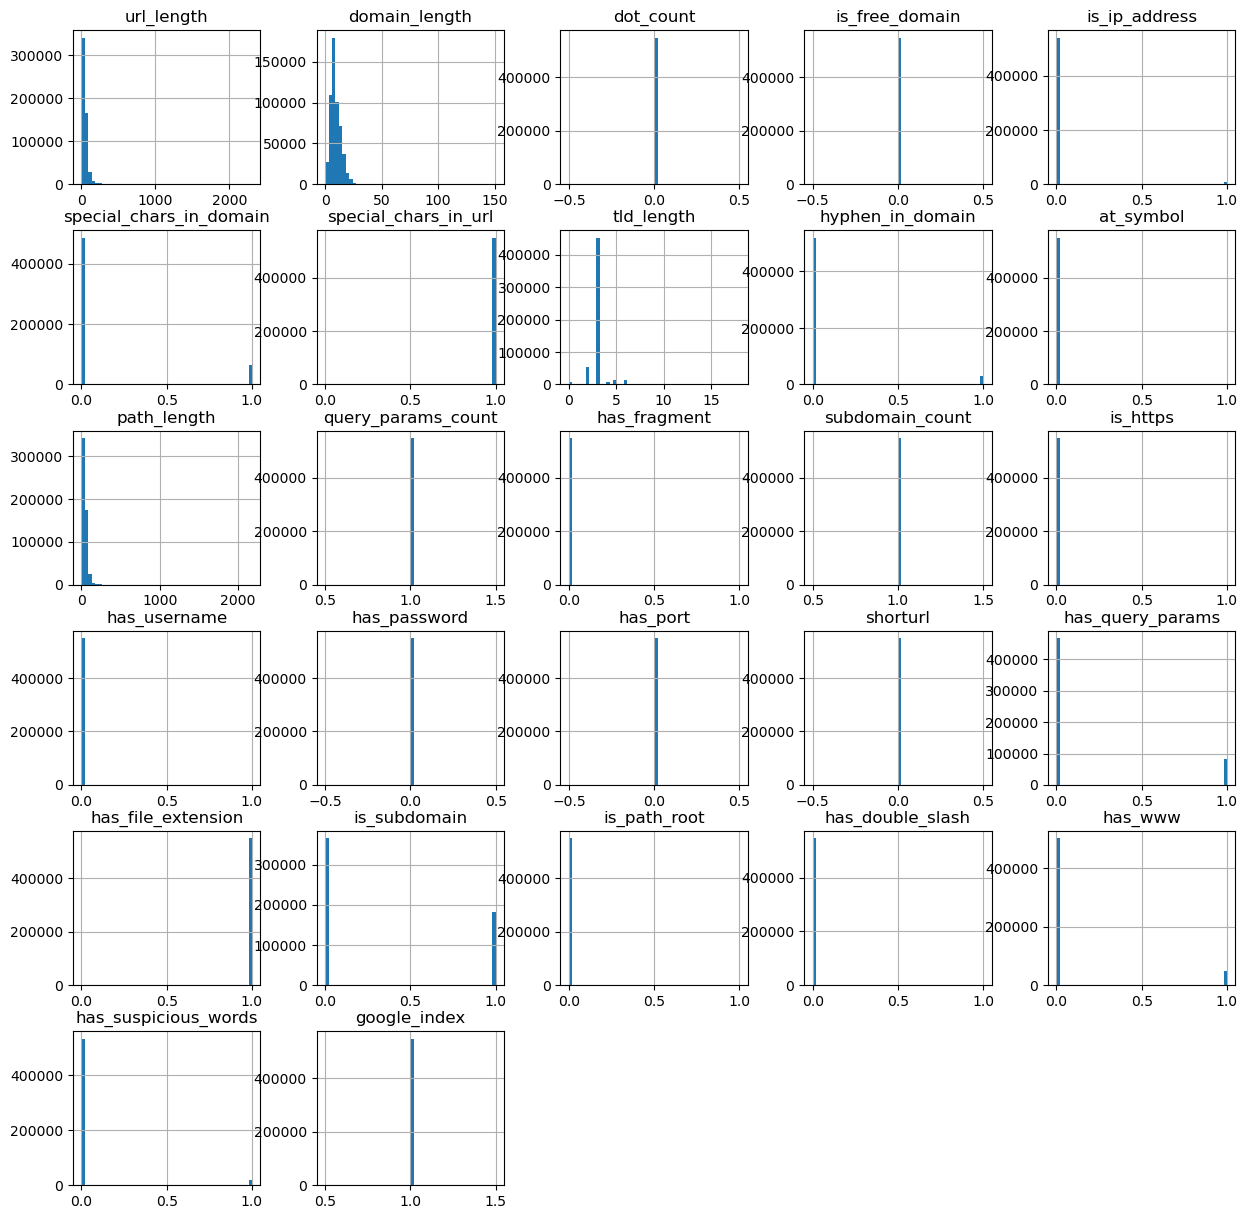

In [22]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

In [23]:
# Features (X)
X = df.drop(['Domain','Label','features','extract_root_domain','url_length','domain_length','dot_count','is_free_domain','is_ip_address','get_url_region','special_chars_in_domain','special_chars_in_url','has_file_extension','is_subdomain','is_path_root','has_double_slash','has_www','has_suspicious_words','google_index','tokenize_and_stem_domain','text_stemmed','text_sent'],axis=1)
X

,tld_length,hyphen_in_domain,at_symbol,path_length,query_params_count,has_fragment,subdomain_count,is_https,has_username,has_password,has_port,shorturl,has_query_params
0,2,0,0,134,1,0,1,0,0,0,0,0,1
1,3,0,0,81,1,0,1,0,0,0,0,0,0
2,3,0,0,177,1,0,1,0,0,0,0,0,0
3,3,0,0,60,1,0,1,0,0,0,0,0,0
4,3,0,0,79,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549342,0,0,0,15,1,0,1,0,0,0,0,0,0
549343,3,1,0,18,1,0,1,0,0,0,0,0,0
549344,3,1,0,17,1,0,1,0,0,0,0,0,0
549345,3,1,0,18,1,0,1,0,0,0,0,0,0


In [24]:
# Target variable (y)
y = df['Label']
y

0         Unsafe
1         Unsafe
2         Unsafe
3         Unsafe
4         Unsafe
           ...  
549342    Unsafe
549343    Unsafe
549344    Unsafe
549345    Unsafe
549346    Unsafe
Name: Label, Length: 549347, dtype: object

# Machine Learning Models & Training


* CountVectorizer  is a feature extraction technique in natural language processing (NLP) used to convert a collection of text documents to a matrix of token counts

In [25]:
# Convert text features to a matrix of token counts using CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(df.text_sent)  # Adjust the feature name as needed
X_test_counts = vectorizer.transform(df.text_sent)


##### Splitting the Data

In [26]:
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X_train_counts, df.Label)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:

trainX, testX, trainY, testY = train_test_split(X_train_counts, df.Label, test_size=0.2, random_state=42)


### Desicion Tree

In [29]:
# Creating a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

In [30]:
# Training the classifier on the training data
dt_classifier.fit(trainX, trainY)

DecisionTreeClassifier()

In [31]:
dt_train = dt_classifier.score(trainX, trainY)

In [32]:
dt_test = dt_classifier.score(testX, testY)

### Performance Evaluation 

In [33]:
# Display the results
print(f"Training Accuracy: {dt_train}")
print(f"Testing Accuracy: {dt_test}")

Training Accuracy: 0.999897605562976
Testing Accuracy: 0.9668062255392736


In [34]:
pred = dt_classifier.predict(testX)

In [35]:
# Print classification report
_report =  classification_report(testY,pred,target_names =['Unsafe','Safe'])

In [36]:
# classification report Result
print(_report)

              precision    recall  f1-score   support

      Unsafe       0.98      0.98      0.98     78625
        Safe       0.94      0.95      0.94     31245

    accuracy                           0.97    109870
   macro avg       0.96      0.96      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [37]:
pip = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(pattern).tokenize,stop_words='english'), DecisionTreeClassifier())

In [38]:
trainX, testX, trainY, testY = train_test_split(df.Domain, df.Label)

In [39]:
pip.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [40]:
pip.score(testX,testY) 

0.9651805412962275

### LogisticRegression

In [41]:

trainX, testX, trainY, testY = train_test_split(X_train_counts, df.Label, test_size=0.2, random_state=42)


In [42]:
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)


In [43]:
logreg.fit(trainX,trainY)

LogisticRegression(max_iter=1000, random_state=0)

In [44]:
# Calculate training accuracy
accuracy_train = logreg.score(trainX, trainY)

In [45]:
# Calculate testing accuracy
accuracy_test = logreg.score(testX, testY)

* Performance Evaluation:

In [46]:
# Display the results
print(f"Training Accuracy: {round(accuracy_train, 2)}")
print(f"Testing Accuracy: {round(accuracy_test, 2)}")

Training Accuracy: 0.98
Testing Accuracy: 0.97


In [47]:
# Make predictions on the test set
predictions = logreg.predict(testX)


In [48]:
# Print classification report
class_report =  classification_report(testY,predictions,target_names =['Unsafe','Safe'])

In [49]:
# classification report Result
print(class_report)

              precision    recall  f1-score   support

      Unsafe       0.96      0.99      0.98     78625
        Safe       0.97      0.91      0.94     31245

    accuracy                           0.97    109870
   macro avg       0.97      0.95      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [50]:
pipe = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(pattern).tokenize,stop_words='english'), LogisticRegression())

In [51]:
trainX, testX, trainY, testY = train_test_split(df.Domain, df.Label)

In [52]:
pipe.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [53]:
pipe.score(testX,testY) 

0.9666440944537888

* Saving Models

In [61]:
pickle.dump(pip,open('machine_train_model.pkl','wb'))
print("Model saved successfully as 'machine_train_model.pkl'")

Model saved successfully as 'machine_train_model.pkl'


In [64]:
predict_bad = ['https://bafkreibbx2jxixrce2bdpsgx4g42l2joe6mxjd7hba67btz6eqvtp7b5oa.ipfs.dweb.link/?aod=info@coamxx.name.ng']
loaded_model = pickle.load(open('train_model.pkl', 'rb'))

result = loaded_model.predict(predict_bad)
print(result)


['Unsafe']
